In [138]:
import sys
sys.path.append('/home/dmoi/projects/foldtree2')
#read the afdb clusters file
import pandas as pd
import numpy as np
import glob
import os
#autoreload
import pickle
from src import AFDB_tools
import toytree
import tqdm
from matplotlib import pyplot as plt

In [139]:
datadir = '/home/dmoi/datasets/'

In [140]:
#read the afdb rep file
reps = pd.read_table( datadir + 'afdbclusters/1-AFDBClusters-entryId_repId_taxId.tsv', header=None, names=['entryId', 'repId', 'taxId'] )
print( 'reps' , reps.head() )

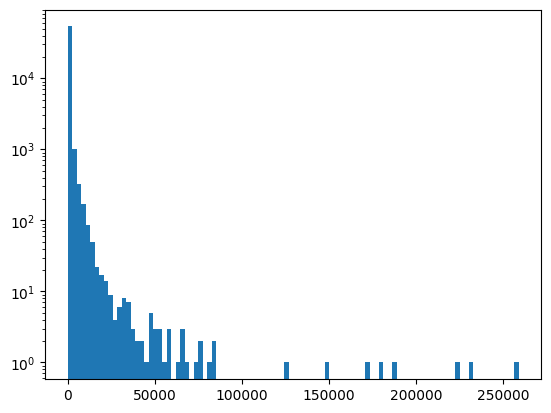

In [141]:
#find the most represented taxids
taxid_counts = reps['taxId'].value_counts()
print( 'taxid_counts', taxid_counts.head() )

#hist of taxid counts
plt.hist( taxid_counts, bins=100 )
plt.yscale('log')
plt.show()


In [142]:
#import ete3 and ncbi taxonomy
from ete3 import NCBITaxa
ncbi = NCBITaxa()

#find all archaea, bacteria and eukaryota taxids and turn the into a set
archaea = ncbi.get_descendant_taxa('Archaea')
bacteria = ncbi.get_descendant_taxa('Bacteria')
eukaryota = ncbi.get_descendant_taxa('Eukaryota')

archaea = set(archaea)
bacteria = set(bacteria)
eukaryota = set(eukaryota)

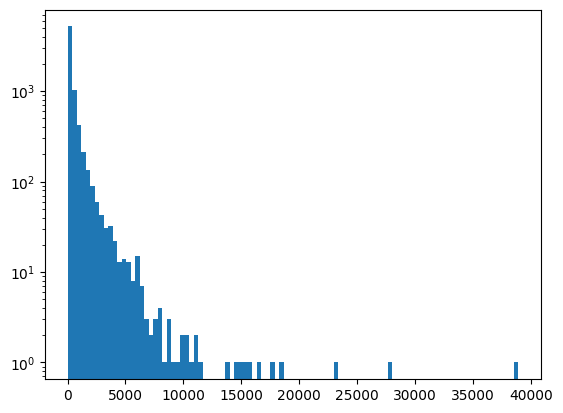

In [143]:
#filter the reps to the most represented taxids
archaea_reps = reps[ reps['taxId'].isin( archaea_topk.index ) ]
bacteria_reps = reps[ reps['taxId'].isin( bacteria_topk.index ) ]
eukaryota_reps = reps[ reps['taxId'].isin( eukaryota_topk.index ) ]

#interset the reps from all domains
archaea_reps_set = set( archaea_reps['repId'] )
bacteria_reps_set = set( bacteria_reps['repId'] )
eukaryota_reps_set = set( eukaryota_reps['repId'] )

all_reps = archaea_reps_set.intersection( bacteria_reps_set ).intersection( eukaryota_reps_set )
all_reps_df = reps[ reps['repId'].isin( all_reps ) ]
#count the number of entries for each rep
rep_counts = all_reps_df['repId'].value_counts()
print( 'rep_counts', rep_counts.head() )
#hist with log scale on y axis
plt.hist( rep_counts, bins=100 )
plt.yscale('log')
plt.show()

In [ ]:
completeness = {}
for rep in tqdm.tqdm( all_reps_df.repId.unique() ):
	taxa = set( all_reps_df[ all_reps_df['repId'] == rep ]['taxId'] )
	eukarya_complete = len( taxa.intersection( eukaryota ) ) / len( eukaryota )
	bacteria_complete = len( taxa.intersection( bacteria ) ) / len( bacteria )
	archaea_complete = len( taxa.intersection( archaea ) ) / len( archaea )
	completeness[rep] = {'eukarya': eukarya_complete, 'bacteria': bacteria_complete, 'archaea': archaea_complete }


  0%|▎                                                                 | 34/7344 [00:08<30:20,  4.01it/s]


KeyboardInterrupt: 

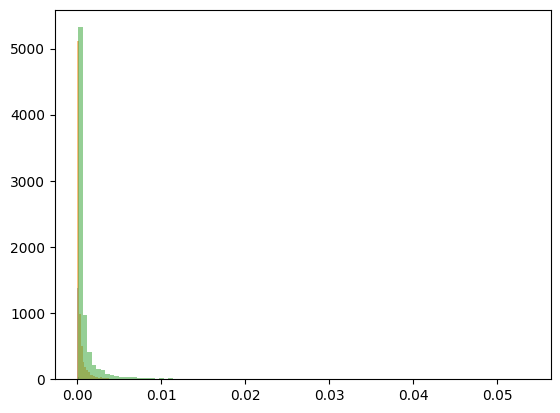

In [47]:
rep_completeness = pd.DataFrame( completeness ).T
#hist of completeness
plt.hist( rep_completeness['eukarya'], bins=100 , label='eukarya' , alpha = 0.5)
plt.hist( rep_completeness['bacteria'], bins=100 , label='bacteria' , alpha = 0.5)
plt.hist( rep_completeness['archaea'], bins=100 , label='archaea' , alpha = 0.5)
plt.show()

rep_completeness              eukarya  bacteria   archaea      mean
A0A0S8KCF8  0.000129  0.020940  0.053729  0.024933
A0A511Z0P3  0.000506  0.014970  0.030190  0.015222
A0A151A8L2  0.000036  0.012083  0.030862  0.014327
A0A497FII2  0.000300  0.011556  0.030190  0.014015
A0A1G7UCA2  0.000011  0.013776  0.025930  0.013239


<Axes: >

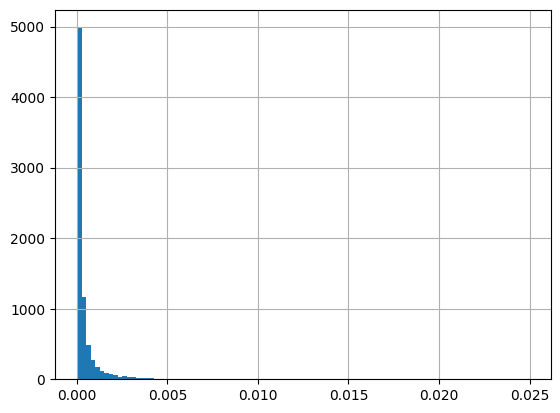

In [66]:
#find the most complete reps across all domains
rep_completeness['mean'] = rep_completeness.mean( axis=1 )
rep_completeness = rep_completeness.sort_values('mean', ascending=False)
print( 'rep_completeness', rep_completeness.head() )
rep_completeness['mean'].hist( bins=100 )

In [67]:
#save the rep completeness
rep_completeness.to_csv( datadir + 'afdbclusters/rep_completeness.csv' )

In [68]:
top_complete = rep_completeness.head(200)
top_complete_reps = reps[ reps['repId'].isin( top_complete.index ) ]
top_complete_reps.to_csv( datadir + 'afdbclusters/top_complete_reps.csv' )

In [69]:
print( 'top_complete_reps', top_complete_reps.head() )

top_complete_reps            entryId       repId    taxId
383007  A0A031LPN5  A0A087E405  1160895
383008  A0A031LTL4  A0A087E405  1160895
383009  A0A060SHI3  A0A087E405     5643
383010  A0A073J2A3  A0A087E405     2754
383011  A0A074VUL4  A0A087E405  1043003


A0A087E405 {1904640, 51201, 1226754, 2004995, 1208324, 446470, 2306055, 114699, 1603606, 1069081, 2596890, 561184, 1628193, 2054177, 2060323, 163877, 225324, 2496558, 2052143, 307249, 2052146, 2340915, 282676, 2052149, 2052148, 2560055, 1325112, 2766897, 405564, 401471, 2052160, 2052164, 2771012, 2052166, 497735, 673860, 1986633, 1642570, 145483, 622671, 2052176, 2052179, 2052180, 880724, 2052185, 2052186, 45151, 1095777, 1679460, 1495144, 311403, 2283629, 2161, 577650, 1798261, 1437817, 575609, 124, 1169539, 530564, 635013, 45200, 1974417, 2068625, 2508949, 150, 1798300, 2541728, 166, 1489064, 565419, 1986731, 1005740, 272557, 1296565, 2820278, 272569, 2042042, 2234, 379066, 147645, 2595005, 1962179, 197, 202951, 1249480, 1986761, 2744522, 479436, 205, 1919184, 210, 1673428, 1986772, 1777879, 1919192, 2732249, 483547, 211165, 1884382, 2052317, 321763, 59620, 981222, 151784, 213224, 2280, 2285, 2740464, 41202, 1411316, 626932, 76022, 1872119, 1476857, 1476858, 41211, 569599, 33025, 154

/home/dmoi/miniforge3/envs/pyg/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/dmoi/miniforge3/envs/pyg/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


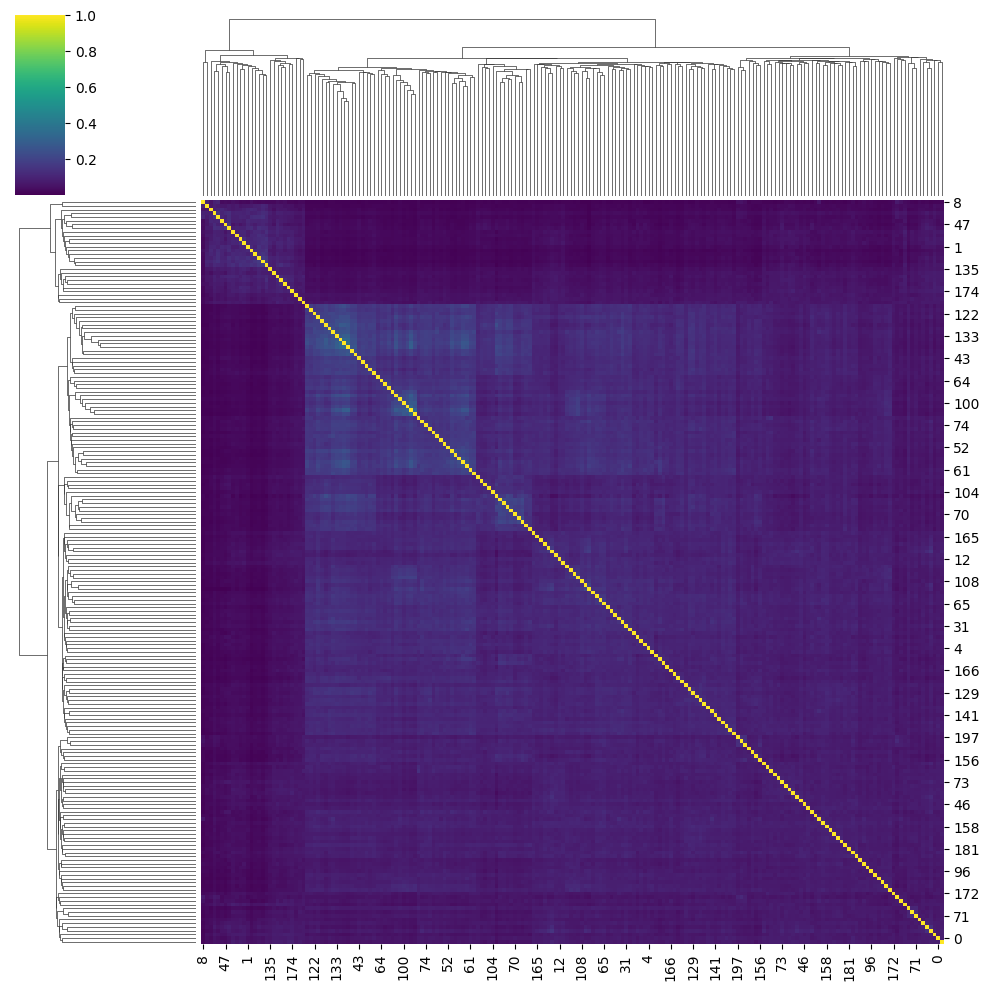

In [ ]:
import seaborn as sns
famtaxa = {}
for i,fam in enumerate(top_complete_reps['repId'].unique()):
	sub = top_complete_reps[ top_complete_reps['repId'] == fam ]
	sub_taxa = set( sub['taxId'] )
	famtaxa[fam] = sub_taxa
	if i< 10:
		print( fam, sub_taxa )
print('done compiling famtaxa')
#all vs all jaccard of taxa
jaccard = np.zeros( (len(famtaxa), len(famtaxa)) )
for i, fam1 in enumerate( famtaxa ):
	for j, fam2 in enumerate( famtaxa ):
		if i < j:
			jaccard[i,j] = len( famtaxa[fam1].intersection( famtaxa[fam2] ) ) / len( famtaxa[fam1].union( famtaxa[fam2] ) )
jaccard = jaccard + jaccard.T
np.fill_diagonal( jaccard, 1.0 )
sns.clustermap( jaccard, cmap='viridis' )
plt.show()

[0 4 0 2 2 0 0 2 3 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 2 4 2 0 2 2
 0 2 2 2 2 2 2 2 2 0 4 2 2 0 2 2 2 2 0 2 0 0 0 1 2 2 0 2 2 2 2 0 2 2 0 0 0
 2 2 2 0 2 3 2 0 2 2 2 2 1 0 2 2 2 2 2 4 0 2 0 2 0 2 2 2 0 0 2 2 0 0 2 2 2
 0 0 2 2 2 0 0 2 4 2 2 2 0 2 2 4 0 2 2 2 2 1 2 0 1 2 4 2 2 2 2 2 4 2 0 2 1
 0 0 2 4 1 4 4 2 0 2 0 1 0 2 0 2 2 2 2 2 2 2 2 2 0 4 1 2 4 2 1 0 2 0 4 0 0
 2 2 0 0 4 2 4 2 0 0 2 2 0 0 1]
[0 1 2 3 4]


/home/dmoi/miniforge3/envs/pyg/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


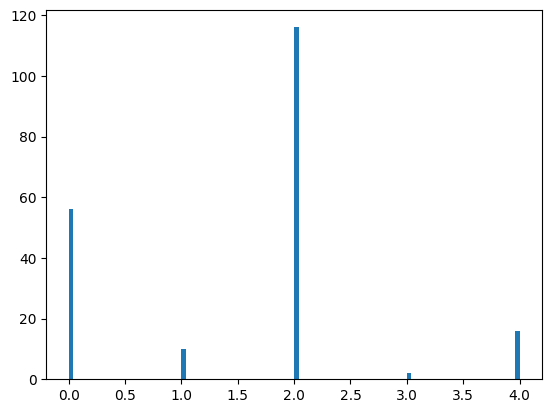

In [73]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering( n_clusters=5, linkage='average' ).fit( 1-jaccard )
print( clustering.labels_ )
print( np.unique( clustering.labels_ ) )

#plot the cluster sizes
plt.hist( clustering.labels_, bins=100 )
plt.show()

In [83]:
#select the largest cluster
largest_cluster = np.argmax( np.bincount( clustering.labels_ ) )
print( 'largest_cluster', largest_cluster )

#select the reps in the largest cluster
largest_cluster_reps = [ fam for i, fam in enumerate( famtaxa ) if clustering.labels_[i] == largest_cluster ]
print( 'largest_cluster_reps', largest_cluster_reps )
print( 'largest_cluster_reps', len(largest_cluster_reps) )

largest_cluster_reps_df = top_complete_reps[ top_complete_reps['repId'].isin( largest_cluster_reps ) ]
largest_cluster_reps_df.to_csv( datadir + 'afdbclusters/largest_cluster_reps.csv' )

largest_cluster 2
largest_cluster_reps ['A0A0B8NHG6', 'A0A0C3QUU7', 'A0A0G1Q359', 'A0A0H4CIK2', 'A0A0J1FBX8', 'A0A0K8QQP8', 'A0A0K9PQ00', 'A0A0M2R4L7', 'A0A0Q6G1K0', 'A0A0S4QIH6', 'A0A0S8KCF8', 'A0A117LCW6', 'A0A151A8L2', 'A0A1B1ZHS2', 'A0A1F5KK39', 'A0A1F7USQ0', 'A0A1F8NP68', 'A0A1G1WE19', 'A0A1G2VWK2', 'A0A1G6XTT0', 'A0A1G7UCA2', 'A0A1I5PI28', 'A0A1J4V3I8', 'A0A1M4T8E9', 'A0A1M7K029', 'A0A1Q3TPP3', 'A0A1Q4DNJ1', 'A0A1Q5AMZ7', 'A0A1Q5GHU6', 'A0A1Q7KCW4', 'A0A1Q7W120', 'A0A1T4LY10', 'A0A1T4YXX7', 'A0A1Y0BPH5', 'A0A1Y5HS28', 'A0A2D7DQR8', 'A0A2D9CJD2', 'A0A2E1S0U7', 'A0A2E3V610', 'A0A2E8V8N2', 'A0A2I0PX07', 'A0A2K3QAH8', 'A0A2N5M6R4', 'A0A2N6CFB0', 'A0A2P8E7M8', 'A0A2P8Z8W0', 'A0A2S4XKW4', 'A0A2T4YKQ4', 'A0A2V8Q8T4', 'A0A2W5EIU1', 'A0A352UH23', 'A0A378QWE8', 'A0A3A4KE48', 'A0A3D0CXI9', 'A0A3D4EGW7', 'A0A3D5PDN5', 'A0A3L6ZQM0', 'A0A3N0ZSS0', 'A0A3N5X6K7', 'A0A3Q8XPW2', 'A0A430K5L7', 'A0A433PM45', 'A0A495BY80', 'A0A497FII2', 'A0A4Q4DDS8', 'A0A4Q5UCQ6', 'A0A4R3KKA3', 'A0A4Y8X1W0', 'A0A511Z

In [93]:
print( 'largest_cluster_reps_df', largest_cluster_reps_df.head() )
print( len( largest_cluster_reps_df ) )

largest_cluster_reps_df            entryId       repId    taxId
674136  A0A016S2M6  A0A0B8NHG6    53326
674137  A0A022WDK2  A0A0B8NHG6  1215330
674138  A0A024H665  A0A0B8NHG6   861266
674139  A0A031IZZ0  A0A0B8NHG6   158500
674140  A0A031LUS9  A0A0B8NHG6  1160895
808905


In [94]:
#save the repstructs dataframe
largest_cluster_reps_df.to_csv( datadir + 'afdbclusters/largest_cluster_reps.csv' )

In [ ]:
print( len( largest_cluster_reps_df.taxId.unique() ) )	
#find the taxids with coverage of the most reps

filtered = []
for rep in tqdm.tqdm(largest_cluster_reps_df.repId.unique()):
	sub = largest_cluster_reps_df[ largest_cluster_reps_df['repId'] == rep ]
	sub = sub.drop_duplicates( 'taxId' )
	filtered.append( sub )
filtered = pd.concat( filtered )
print( 'filtered', filtered.head() )
print( len(filtered))

33020


100%|█| 116/116 [00:06<00:

filtered            entryId       repId    taxId
674136  A0A016S2M6  A0A0B8NHG6    53326
674137  A0A022WDK2  A0A0B8NHG6  1215330
674138  A0A024H665  A0A0B8NHG6   861266
674139  A0A031IZZ0  A0A0B8NHG6   158500
674140  A0A031LUS9  A0A0B8NHG6  1160895
469862


In [ ]:
#find the most represented taxids
taxid_counts = filtered['taxId'].value_counts()
print( 'taxid_counts', taxid_counts.head() )
#select the top 10 taxids for each domain	
archaea_topk = taxid_counts[ taxid_counts.index.isin( archaea ) ].head(10)
bacteria_topk = taxid_counts[ taxid_counts.index.isin( bacteria ) ].head(10)
eukaryota_topk = taxid_counts[ taxid_counts.index.isin( eukaryota ) ].head(10)
#turn these into dataframes
archaea_topk = pd.DataFrame( archaea_topk )
bacteria_topk = pd.DataFrame( bacteria_topk )
eukaryota_topk = pd.DataFrame( eukaryota_topk )
#map names to taxids	
archaea_names = ncbi.get_taxid_translator( archaea_topk.index )
bacteria_names = ncbi.get_taxid_translator( bacteria_topk.index )
eukaryota_names = ncbi.get_taxid_translator( eukaryota_topk.index )
archaea_topk['name'] = archaea_topk.index.map( archaea_names )
bacteria_topk['name'] = bacteria_topk.index.map( bacteria_names )
eukaryota_topk['name'] = eukaryota_topk.index.map( eukaryota_names )
print( 'archaea_topk', archaea_topk )
print( 'bacteria_topk', bacteria_topk )
print( 'eukaryota_topk', eukaryota_topk )	

taxid_counts taxId
1883427    116
2026742    116
2080302    116
1913988    116
1978231    116
Name: count, dtype: int64
archaea_topk          count                                name
taxId                                             
2026739    115          Methanobacteriota archaeon
2026714    114  Candidatus Bathyarchaeota archaeon
1906665    110                            archaeon
115547     109                 uncultured archaeon
2053489    109          Promethearchaeota archaeon
1906666    107             Thermoplasmata archaeon
2250277    106               Thermoprotei archaeon
2026803    105  Candidatus Woesearchaeota archaeon
2026795    100           Nitrososphaerota archaeon
2268198     98            Nitrososphaeria archaeon
bacteria_topk          count                           name
taxId                                        
1883427    116        Actinomycetes bacterium
2026742    116      Gemmatimonadota bacterium
2080302    116       Acidimicrobiia bacterium
1913988    

In [108]:
#these have good coverage in the largest cluster
taxaset = set( archaea_topk.index ).union( set( bacteria_topk.index ) ).union( set( eukaryota_topk.index ) )
print( 'taxaset', taxaset )
#select these taxids in the largest cluster
largest_cluster_reps_df = largest_cluster_reps_df[ largest_cluster_reps_df['taxId'].isin( taxaset ) ]
print( 'largest_cluster_reps_df', largest_cluster_reps_df.head() , len(largest_cluster_reps_df) )

taxaset {1913988, 1913989, 1764295, 3218, 1234261, 2026714, 115547, 1344416, 1879010, 1883427, 2026724, 2250277, 2268198, 89957, 1314790, 1906665, 1906666, 2026795, 45351, 200361, 2080302, 2026735, 2053489, 2026739, 2026803, 2026742, 1978231, 433720, 282301, 1977087}
largest_cluster_reps_df            entryId       repId    taxId
674218  A0A0D5ZEK8  A0A0B8NHG6   115547
674382  A0A139APY7  A0A0B8NHG6  1344416
674383  A0A139ATS5  A0A0B8NHG6  1344416
674832  A0A1Y1YVT3  A0A0B8NHG6  1314790
674933  A0A293ND32  A0A0B8NHG6  1913989 74381


In [112]:
#save this subset
largest_cluster_reps_df.to_csv( datadir + 'afdbclusters/largest_cluster_reps_filtered.csv' )

In [5]:
import pandas as pd
import os
datadir = '/home/dmoi/datasets/'
largest_cluster_reps_df = pd.read_csv( datadir + 'afdbclusters/largest_cluster_reps_filtered.csv' )

In [6]:
os.makedirs( datadir + 'afdbclusters/structfams/', exist_ok=True )
#clear the structfams directory


In [159]:
import tqdm
for r in tqdm.tqdm(largest_cluster_reps_df.repId.unique()):
	sub = largest_cluster_reps_df[ largest_cluster_reps_df.repId == r ]
	#select only 1 rep per taxid
	sub = sub.drop_duplicates(subset='taxId')
	os.makedirs( datadir + 'afdbclusters/structfams/' + str(r), exist_ok=True )
	os.makedirs( datadir + 'afdbclusters/structfams/' + str(r) + '/structs/', exist_ok=True )
	for uniID in sub.entryId:
		AFDB_tools.grab_struct(uniID , structfolder= datadir + 'afdbclusters/structfams/' + str(r) + '/structs/')

100%|█████████████████████████████████████████████████████████████████| 116/116 [00:00<00:00, 168.42it/s]


In [160]:
import subprocess
import shlex
from Bio import SeqIO

def run_foldmason(structdir, output_dir):
	#run foldmason
	cmd = 'foldmason easy-msa {0} {1}foldmason.fasta {2}foldmasontmp '.format(structdir, output_dir , output_dir)
	print(cmd)
	subprocess.run(shlex.split(cmd))
	return output_dir + 'foldmason.fasta'

def prepare_family(input_folder, outfolder):
	#run foldmason
	foldmason_aln = run_foldmason(input_folder, outfolder)
	#parse the foldmason alignment
	return foldmason_aln, outfolder + 'fidentfoldtree.nwk'

for fam in tqdm.tqdm(largest_cluster_reps_df.repId.unique()):
	print(fam)
	prepare_family(datadir + 'afdbclusters/structfams/'+fam+'/structs/' , datadir + 'afdbclusters/structfams/'+fam + '/' )
	

100%|██████████████████████████████████████████████████████████████████| 116/116 [02:48<00:00,  1.45s/it]


In [ ]:
#show some of the alignments as examples
name = 'foldmason.fasta_aa.fa'
taxmap = dict( zip( largest_cluster_reps_df['repId'], largest_cluster_reps_df['taxId'] ) )
from Bio import SeqIO
for i,fam in enumerate(largest_cluster_reps_df.repId.unique()):	
	foldmason_aln = datadir + 'afdbclusters/structfams/'+fam + '/' + name
	#map the seqids to taxids and add them to the sequence names
	records = []
	for record in SeqIO.parse( foldmason_aln, 'fasta' ):
		taxid = taxmap[fam]
		record.id = record.id + '|taxid=' + str(taxid)
		records.append( record )
	SeqIO.write( records, foldmason_aln + '.taxid.fa', 'fasta' )

largest_cluster_reps_df    Unnamed: 0     entryId       repId    taxId
0      674218  A0A0D5ZEK8  A0A0B8NHG6   115547
1      674382  A0A139APY7  A0A0B8NHG6  1344416
2      674383  A0A139ATS5  A0A0B8NHG6  1344416
3      674832  A0A1Y1YVT3  A0A0B8NHG6  1314790
4      674933  A0A293ND32  A0A0B8NHG6  1913989


In [14]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()
taxa = set( taxmap.values() )
print( 'taxa', taxa )
#translate the taxids to names
taxnames = ncbi.get_taxid_translator( taxa )
print( 'taxnames', taxnames )

taxa {1913988, 2268198, 45351, 1906665, 1906666, 2053489, 3218, 2026803, 2026742, 2026714, 115547, 1977087}
taxnames {3218: 'Physcomitrium patens', 45351: 'Nematostella vectensis', 115547: 'uncultured archaeon', 1906665: 'archaeon', 1906666: 'Thermoplasmata archaeon', 1913988: 'Alphaproteobacteria bacterium', 1977087: 'Pseudomonadota bacterium', 2026714: 'Candidatus Bathyarchaeota archaeon', 2026742: 'Gemmatimonadota bacterium', 2026803: 'Candidatus Woesearchaeota archaeon', 2053489: 'Promethearchaeota archaeon', 2268198: 'Nitrososphaeria archaeon'}


In [1]:
cd /home/dmoi/projects/foldtree2

/home/dmoi/projects/foldtree2


In [ ]:
#map structures to ft2 alphabet 
#change the modelname to the one you want to load
import glob
import ft2treebuilder as tb
modelname = 'angles_geomk2_transformer_large'
modeldir = 'models/'
datadir = '/home/dmoi/datasets/'
structlist =datadir + 'afdbclusters/structfams/*/structs/*.pdb'
treebuilder  = tb.treebuilder( model = modeldir + modelname  )
encoded = treebuilder.encode_structblob_raxml( structlist, outfile=datadir + 'afdbclusters/structfams/encoded_'+ modelname + '.fasta' )
print( 'encoded fasta of all structs', encoded )

0it [00:00, ?it/s]

converting structures


2373it [29:18,  1.24s/it]

In [ ]:
#recode the alignment to ft2 alphabet


/home/dmoi/miniforge3/envs/pyg/lib/python3.12/site-packages/Bio/SeqRecord.py:228: BiopythonDeprecationWarning: Using a string as the sequence is deprecated and will raise a TypeError in future. It has been converted to a Seq object.
  warnings.warn(


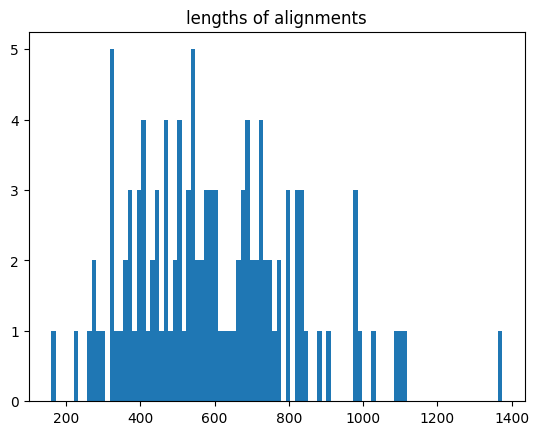

In [ ]:
#create concatenated alignment
from matplotlib import pyplot as plt
concatenated = []
lengths = {}
tax_records = {}
for fam in largest_cluster_reps_df.repId.unique():
    foldmason_aln = datadir + 'afdbclusters/structfams/'+fam + '/' + name
    records = SeqIO.parse( foldmason_aln + '.taxid.fa', 'fasta' )
    taxa = set()
    for i,record in enumerate(records):
        if i == 0:
            lengths[fam]= len(record.seq)
        tax = record.id.split('|taxid=')[-1]
        if tax not in tax_records:
            tax_records[tax] = {}
        tax_records[tax][fam] = record
        taxa.add( tax )
    leftovers = set( taxmap.values() ) - taxa
    for tax in leftovers:
        if tax not in tax_records:
            tax_records[tax] = {}
        seq =  '-' * lengths[fam]
        record = SeqIO.SeqRecord( seq, id='missing|taxid=' + str(tax) )
        tax_records[tax][fam] = record
    
plt.hist( lengths.values(), bins=100 )
plt.title('lengths of alignments')
plt.show()

In [ ]:
#create a concatenated alignment
aln = {}
for tax in tax_records:
    if tax not in aln:
        aln[tax] = ''
    for fam in tax_records[tax]:
        aln[tax] += str(tax_records[tax][fam].seq)
#write the concatenated alignment
with open( datadir + 'afdbclusters/structfams/concatenated.fasta', 'w') as f:
    for tax in aln:
        f.write( '>' + taxnames[int(tax)] + '\n' )
        f.write( aln[tax] + '\n' )



In [ ]:
#read family alignments and add blank sequences for missing taxa
taxset = list( set( archaea_topk.index ).union( set( bacteria_topk.index ) ).union( set( eukaryota_topk.index ) ) )
#sort the taxset
taxset.sort()

In [157]:

for r in tqdm.tqdm(largest_cluster_reps_df.repId.unique()):
	sub = largest_cluster_reps_df[ largest_cluster_reps_df.repId == r ]
	#read the foldmason alignment
	aln = list(SeqIO.parse(datadir + 'afdbclusters/structfams/'+r+'/foldmason.fasta', 'fasta'))
	sequences =  {s.id : s for s in aln}
	aln_length = len(aln[0])
	#reorder the sequences according to the taxset
	sub = sub[ sub['taxId'].isin( taxset ) ]
	taxdict = dict( zip( sub['taxId'], sub['entryId'] ) )
	alnout = []
	for tax in taxset:
		if tax not in taxdict:
			#add a blank sequence
			alnout.append(SeqIO.SeqRecord( Seq('-'*aln_length), id=tax, description=''))
		else:
			alnout.append(sequences[taxdict[tax]])
	#write the alignment to file
	SeqIO.write(alnout, datadir + 'afdbclusters/structfams/'+r+'/foldmason_filtered.fasta', 'fasta')
	

  0%|                                                                            | 0/116 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/home/dmoi/datasets/afdbclusters/structfams/A0A0B8NHG6/foldmason.fasta'

In [133]:
cd /home/dmoi/projects/foldtree2/

In [ ]:
#convert all structures to encoded fasta
import ft2treebuilder
modelfile = './models/small/small'
tb = ft2treebuilder.treebuilder(model = modelfile)
for r in largest_cluster_reps_df.repId.unique():
	structfolder = datadir + 'afdbclusters/structfams/' + str(r) + '/structs/'
	outfasta = datadir + 'afdbclusters/structfams/' + str(r) + '/endcoded_structs.fasta'
	outfasta = tb.encode_structblob_raxml( structfolder + '*.pdb', outfasta)
	#rewrite the foldmason alignment with encoded sequences
	

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:22<00:00,  1.14it/s]
26it [00:22,  1.14it/s]


ValueError: invalid literal for int() with base 10: '\x01\x01\x16#\x03\x07\x03'

In [ ]:
#create a concatenated alignment of all families
with open( datadir + 'afdbclusters/concatenated.fasta' , 'w') as f:
	for fam in tqdm.tqdm(glob.glob(datadir +'afdbclusters/structfams/*/')):
		fasta = fam + 'encoded.fasta'
		with open( fasta , 'r') as g:
			for l in g:
				f.write( l )

#write the raxml partition file with the start and end of each family in the concatenated alignment
#based on alignment length

with open( datadir + 'afdbclusters/partitions.txt' , 'w') as f:
	start = 0
	for fam in tqdm.tqdm(glob.glob(datadir +'afdbclusters/structfams/*/')):
		fasta = fam + 'encoded.fasta'
		with open( fasta , 'r') as g:
			for l in g:
				pass
			end = g.tell()
			f.write( 'MULTISTATE, ' + str(start) + '-' + str(end) + '\n' )
			start = end